# MACD in Action

In [2]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

from data.make_dataset import get_stocks_data
from technical_indicator.macd import get_macd

In [3]:
# Get data
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(3650)
data = get_stocks_data(['MSFT'], start_date, end_date)
df = data.copy()

MSFT is being loaded...
Attemps: 1 for MSFT
Attemps: 2 for MSFT


In [5]:
macd_df = get_macd(df, "MSFT")

In [ ]:
df['ma_fast'] = df['MSFT'].ewm(span=12, min_periods=12).mean()
df['ma_slow'] = df['MSFT'].ewm(span=26, min_periods=26).mean()
df['macd'] = df['ma_fast'] - df['ma_slow']
df['signal'] = df['macd'].ewm(span=9, min_periods=9).mean()
df.dropna(inplace=True)

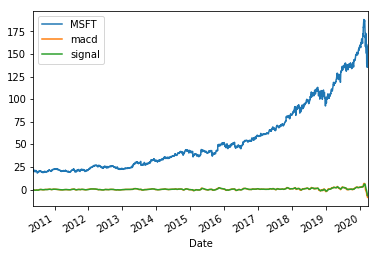

In [8]:
df[['MSFT', 'macd', 'signal']].plot()

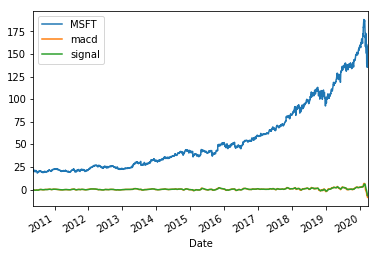

In [7]:
macd_df[['MSFT', 'macd', 'signal']].plot()